In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data,
                                                                      fish_target,
                                                                      random_state=42)

In [5]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [8]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [9]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한 마리

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [12]:
print(kn.predict([[25, 150]]))

[0.]


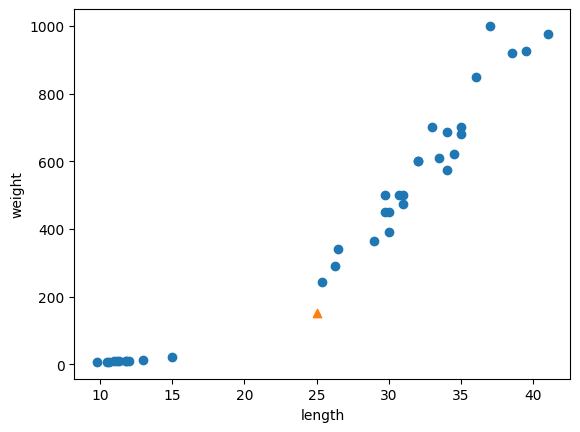

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # marget 매개변수는 모양을 지정함
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

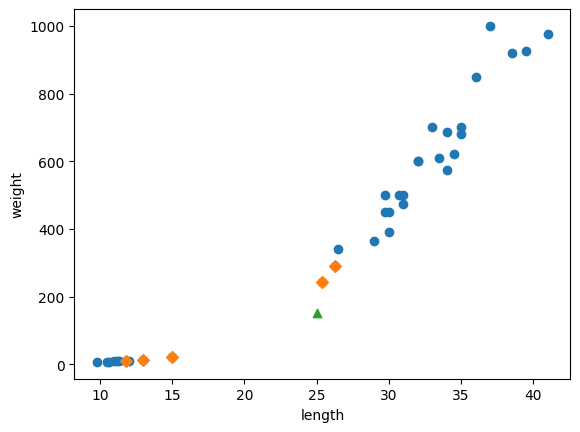

In [15]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


In [17]:
print(train_target[indexes])

[[1. 0. 0. 1. 0.]]


In [18]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


# 기준을 맞춰라

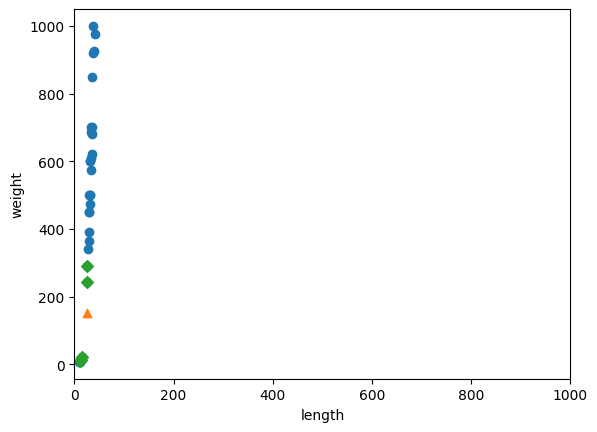

In [19]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [22]:
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.37460577  0.09920189]
 [ 0.27666962 -0.17125451]
 [ 0.34522492  0.2546366 ]
 [-1.45680021 -1.27266487]
 [-1.40783213 -1.26862357]
 [-1.29030875 -1.26178444]
 [ 0.57047806  0.56550602]
 [ 0.44316107  0.2546366 ]
 [ 0.66841421  0.87637544]
 [ 0.86428651  0.87637544]
 [ 1.4519034   1.73126635]
 [ 1.20706303  1.56028817]
 [-0.07590051 -0.54740651]
 [-1.3882449  -1.26924531]
 [ 1.30499918  1.57583164]
 [ 0.34522492  0.09920189]
 [ 1.06015881  1.80898371]
 [ 0.47254192  0.2546366 ]
 [-1.53514913 -1.2763953 ]
 [ 0.01224202 -0.39818919]
 [ 0.76635036  0.82974503]
 [ 0.03182925 -0.24275448]
 [-1.52535551 -1.27794965]
 [-1.60370443 -1.27888226]
 [ 0.86428651  0.81420156]
 [-1.46659382 -1.26924531]
 [ 0.47254192  0.17691924]
 [ 0.81531843  0.6276799 ]
 [ 0.71738229  0.59659296]
 [-1.09443646 -1.2378475 ]
 [ 0.76635036  0.48778866]
 [ 0.37460577 -0.08731977]
 [-1.40783213 -1.26893444]
 [ 0.57047806  0.56550602]
 [ 0.96222266  1.34267957]
 [-1.48618105 -1.26955618]]


## 전처리 데이터로 모델 훈련하기

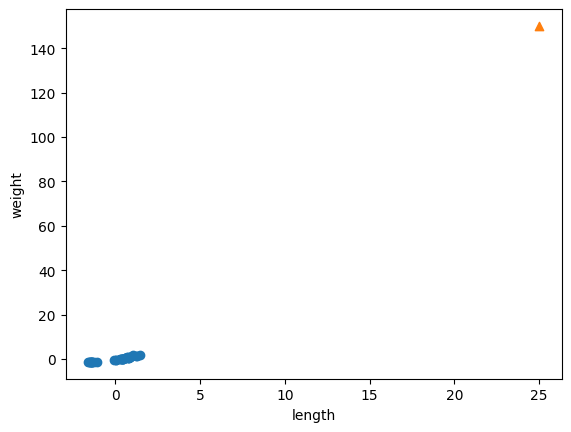

In [23]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

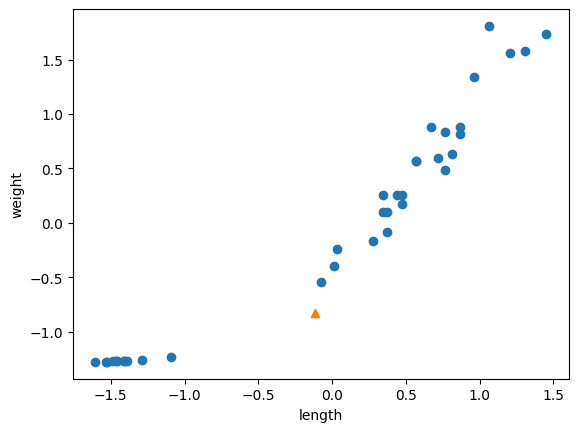

In [24]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [26]:
print(kn.predict([new]))

[1.]


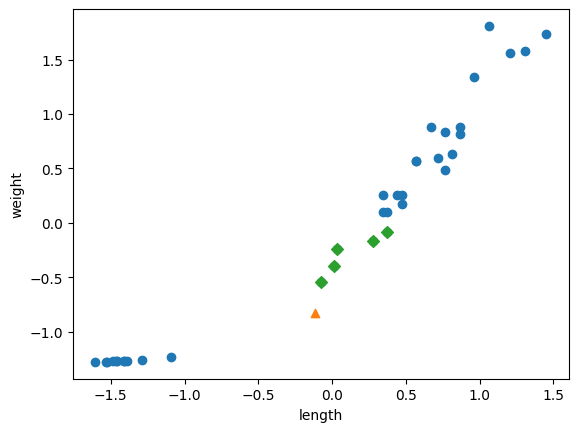

In [27]:
distances, indexex = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexex, 0], train_scaled[indexex, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()